# 수치미분, 자동미분

## 합성함수 미분

In [14]:
from IPython.display import Image
Image(r'composition ex.png')

In [15]:
Image(r'ftn.png')

## chainrule

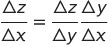

In [16]:
Image(r'chain.png')

## 변화율

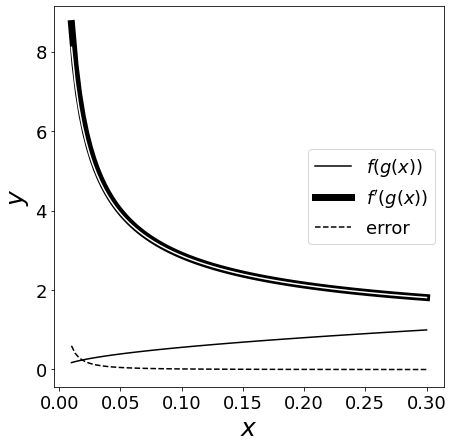

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)

ax.xaxis.set_tick_params(labelsize = 18)
ax.yaxis.set_tick_params(labelsize = 18)
ax.set_xlabel(r'$x$',fontsize = 25)
ax.set_ylabel(r'$y$',fontsize = 25)

x = np.linspace(0.01, 0.3, 100)

h = 0.01

g = lambda x : x**2 +3 *x
dg = lambda x : (g(x+h)-g(x)) / h

f = lambda x : np.sqrt(x)
df = lambda x : (f(x+h)-f(x)) / h

dfg = lambda x : (2*x+3) / (2*np.sqrt(x**2+3*x))

plt.plot( x, f(g(x)), 'k', label = r"$f(g(x))$")
plt.plot( x, dfg(x), 'k', label = r"$f'(g(x))$", lw=7)
plt.plot( x, df(g(x))*dg(x), 'k', c = 'white')


plt.plot( x , dfg(x)-df(g(x))*dg(x), '--', c='k', label='error')

plt.legend(loc = "right", fontsize = 18)

plt.show()

## 변화율에 극한

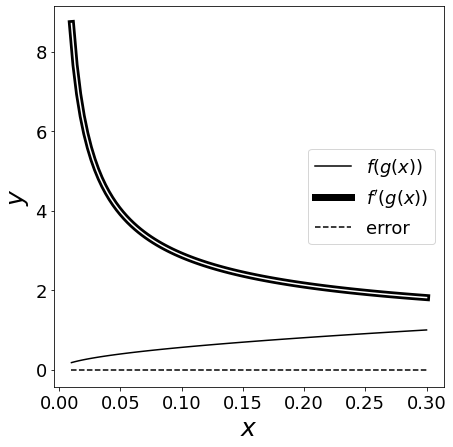

In [3]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)

ax.xaxis.set_tick_params(labelsize = 18)
ax.yaxis.set_tick_params(labelsize = 18)
ax.set_xlabel(r'$x$',fontsize = 25)
ax.set_ylabel(r'$y$',fontsize = 25)

x = np.linspace(0.01, 0.3, 100)

h = 0.01

g = lambda x : x**2 +3 *x
dg = lambda x : 2*x + 3

f = lambda x : np.sqrt(x)
df = lambda x : 1/(2*np.sqrt(x))

dfg = lambda x : (2*x+3) / (2*np.sqrt(x**2+3*x))

plt.plot( x, f(g(x)), 'k', label = r"$f(g(x))$")
plt.plot( x, dfg(x), 'k', label = r"$f'(g(x))$", lw=7)
plt.plot( x, df(g(x))*dg(x), 'k', c = 'white')


plt.plot( x , dfg(x)-df(g(x))*dg(x), '--', c='k', label='error')

plt.legend(loc = "right", fontsize = 18)

plt.show()

# 다변수 함수의 변화율
https://metamath1.github.io/noviceml/partial.html
https://math.libretexts.org/Bookshelves/Calculus/Book%3A_Calculus_(OpenStax)/14%3A_Differentiation_of_Functions_of_Several_Variables/14.5%3A_The_Chain_Rule_for_Multivariable_Functions

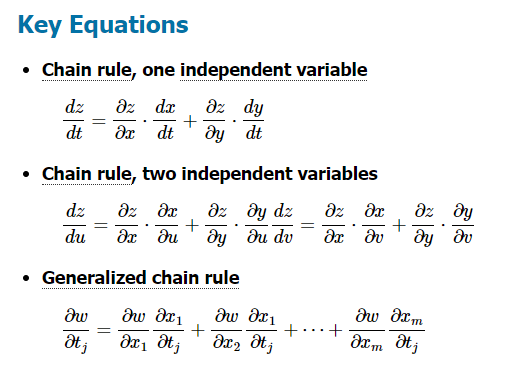

In [17]:
Image(r'chainequation.png')

# 직접 미분의 개념


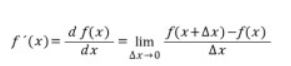

In [18]:
Image(r'diff.png')

In [19]:
Image(r'render.png')

In [16]:
import sympy

x = sympy.Symbol('x')
f = (x**2 + 2*x )*(sympy.log(x))
print(f)
df = sympy.diff(f,x)
print(df)

(x**2 + 2*x)*log(x)
(2*x + 2)*log(x) + (x**2 + 2*x)/x


In [5]:
sympy.simplify(df)

x + 2*(x + 1)*log(x) + 2

# 수치미분의 개념

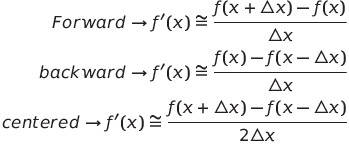

In [20]:
Image(r'num.png')

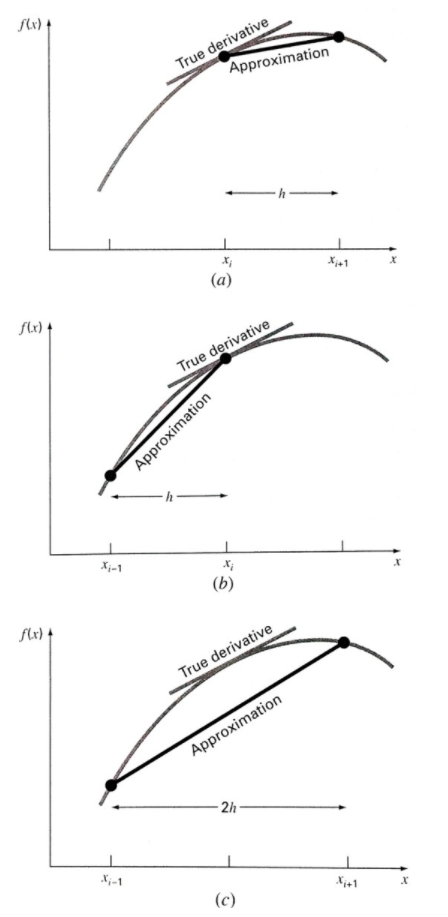

In [21]:
Image(r'numerical.png')

## centerd divided difference

In [17]:
import numpy as np

f = lambda x : (x**2 + 2*x)*np.log(x)
df = lambda x : 2*(x+1)*np.log(x)+(x+2)

In [8]:
def numer_deriv(f,x,h=0.001, method='center'):
    if type(x) in (float, int):
        grad = [0.0]
        x_ = [x]
        var_type = 'scalar'
        
    else:
        grad = np.zeros(x.shape)
        x_ = x.copy().astype('float32')
        var_type = 'vector'
        
    for i, xi in enumerate(x_):
        original_value = x_[i]
        
        if method =='forward':
            x_[i] = original_value + h
        else :
            x_[i] = original_value + (h/2)
        
        
        if var_type == 'scalar':
            gradplus = f(x_[i])
        else :
            gradplus = f(x_)
            
        if method =='forward':
            x_[i] = original_value
        else :
            x_[i] = original_value - (h/2)
            
        if var_type == 'scalar':
            gradminus = f(x_[i])
        else :
            gradminus = f(x_)
            
        grad[i] = (gradplus - gradminus) / h
        
    if var_type =='scalar':
        return grad[0]

    else:
        return grad
    


### h값이 커지면 전방차분법의 오차가 커지지만, 중앙차분법은 상대적으로 오차가 커지지 않는다. 

In [22]:
numer_deriv(f,1)

2.999999999999666

In [18]:
numer_deriv(f, 1, h=0.5, method='forward')

4.257383635135726

In [21]:
numer_deriv(f, 1, h=0.5, method='center')

2.9997299032915508

Text(0.5, 1.0, 'center')

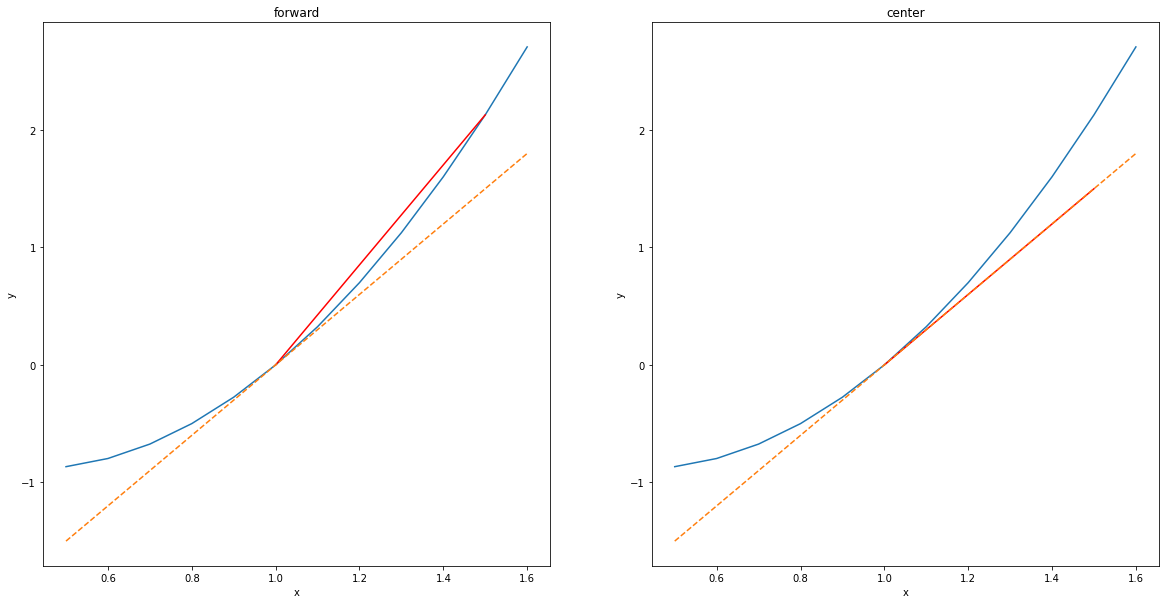

In [57]:
import matplotlib.pyplot as plt

x = np.arange(5,17)*(0.1)
y = f(x)
_x = np.arange(10,16)*(0.1)
_y =numer_deriv(f,1,h=0.5,method='forward')*(_x-1)+f(1)
dy =numer_deriv(f,1)*(x-1)+f(1)
y_=numer_deriv(f,1,h=0.5,method='center')*(_x-1)+f(1)


plt.figure(figsize=(20,10))

plt.subplot(121)
plt.plot(x, y, '-')
plt.plot(_x,_y,'r')
plt.plot(x,dy,'--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('forward')

plt.subplot(122)
plt.plot(x, y, '-')
plt.plot(_x,y_,'r')
plt.plot(x,dy,'--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('center')

### [수치미분법] 
### 장점 : 직접 미분하기 힘든 경우라 해도 미분계수를 구해줄 수 있음. 직관적인 계산과정과 구현이 어렵지 않음. 
### 단점 : 변수 개수만큼 루프를 돌면서 동일한 과정을 반복해 변수가 많으면 속도가 느려짐. 


### 인공지능 분야에서는 수치미분법의 주 용도는 <u> 자동미분의 오류에 대한 검증용 </u>  으로 사용 (gradient check와 같은)

# 자동미분
#### pytorch: GPU를 사용하는 넘파이 대체재

#### tensor: 넘파이에서 제공하는 다차원 어레이의 파이토치 버전
#### 파이토치에서 제공하는 자동미분 기능을 사용하려면 데이터를 꼭 텐서 자료형에 담아야함.

In [3]:
import numpy as np
import torch

#넘파이 어레이를 랜덤 생성시 동일한 어레이 값이 생성되도록 시드 설정
np.random.seed(0)

x = np.random.rand(6).reshape(2,3)

x_tensor = torch.tensor(x)
x_from_numpy = torch.from_numpy(x)
x_Tensor = torch.Tensor(x)
x_Tensor1 = torch.DoubleTensor(x)
x_as_tensor = torch.as_tensor(x)

In [4]:
print(x,x.dtype)

[[0.5488135  0.71518937 0.60276338]
 [0.54488318 0.4236548  0.64589411]] float64


In [60]:
print(x_tensor, x_tensor.dtype, x_tensor.requires_grad)

tensor([[0.5488, 0.7152, 0.6028],
        [0.5449, 0.4237, 0.6459]], dtype=torch.float64) torch.float64 False


In [66]:
print(x_from_numpy, x_from_numpy.dtype, x_from_numpy.requires_grad)

tensor([[0.5488, 0.7152, 0.6028],
        [0.5449, 0.4237, 0.6459]], dtype=torch.float64) torch.float64 False


#### torch.Tensor() : torch.FloatTensor()의 약칭 그래서 float32형으로 형변환 됨.

In [67]:
print(x_Tensor, x_Tensor.dtype,x_Tensor.requires_grad)

tensor([[0.5488, 0.7152, 0.6028],
        [0.5449, 0.4237, 0.6459]]) torch.float32 False


In [71]:
print(x_Tensor1, x_Tensor1.dtype,x_Tensor1.requires_grad)

tensor([[0.5488, 0.7152, 0.6028],
        [0.5449, 0.4237, 0.6459]], dtype=torch.float64) torch.float64 False


In [68]:
print(x_as_tensor, x_as_tensor.dtype, x_as_tensor.requires_grad)

tensor([[0.5488, 0.7152, 0.6028],
        [0.5449, 0.4237, 0.6459]], dtype=torch.float64) torch.float64 False


## EXP : 넘파이 어레이에 요소 하나를 변경시켰을때

In [72]:
x[0,0]=100
print(x,x.dtype)

[[100.           0.71518937   0.60276338]
 [  0.54488318   0.4236548    0.64589411]] float64


### torch.tensor() 와 torch.Tensor() 는 값이 변하지 않음. 왜냐하면 데이터를 복사해서 새롭게 텐서를 만들었으므로

In [73]:
print(x_tensor, x_tensor.dtype, x_tensor.requires_grad)

tensor([[0.5488, 0.7152, 0.6028],
        [0.5449, 0.4237, 0.6459]], dtype=torch.float64) torch.float64 False


In [75]:
print(x_Tensor, x_Tensor.dtype, x_Tensor.requires_grad)

tensor([[0.5488, 0.7152, 0.6028],
        [0.5449, 0.4237, 0.6459]]) torch.float32 False


### torch.from_numpy() 와 torch.as_Tensor() 만 값이 함께 변함. 넘파이 어레이와 데이터를 공유하므로

In [76]:
print(x_from_numpy, x_from_numpy.dtype, x_from_numpy.requires_grad)

tensor([[100.0000,   0.7152,   0.6028],
        [  0.5449,   0.4237,   0.6459]], dtype=torch.float64) torch.float64 False


In [77]:
print(x_as_tensor, x_as_tensor.dtype, x_as_tensor.requires_grad)

tensor([[100.0000,   0.7152,   0.6028],
        [  0.5449,   0.4237,   0.6459]], dtype=torch.float64) torch.float64 False


## What is requires_grad ??? 

#### 만든 텐서를 독립변수로 입력받은 함수를 해당 텐서로 자동미분 하려면 requires_grad=True 로 설정하면됨.

In [79]:
x_tensor_grad = torch.tensor(x, requires_grad=True)
print(x_tensor_grad, x_tensor_grad.dtype, x_tensor_grad.requires_grad)

tensor([[100.0000,   0.7152,   0.6028],
        [  0.5449,   0.4237,   0.6459]], dtype=torch.float64,
       requires_grad=True) torch.float64 True


## torch.autograd.backward

#### torch.autograd 모듈은 스칼라함수를 자동미분하는 기능을 제공함. 
#### 자동미분의 기능으로는 torch.autograd.backward()// torch.autograd.grad()가 있음

In [23]:
Image(r'render.png')

### 계산그래프

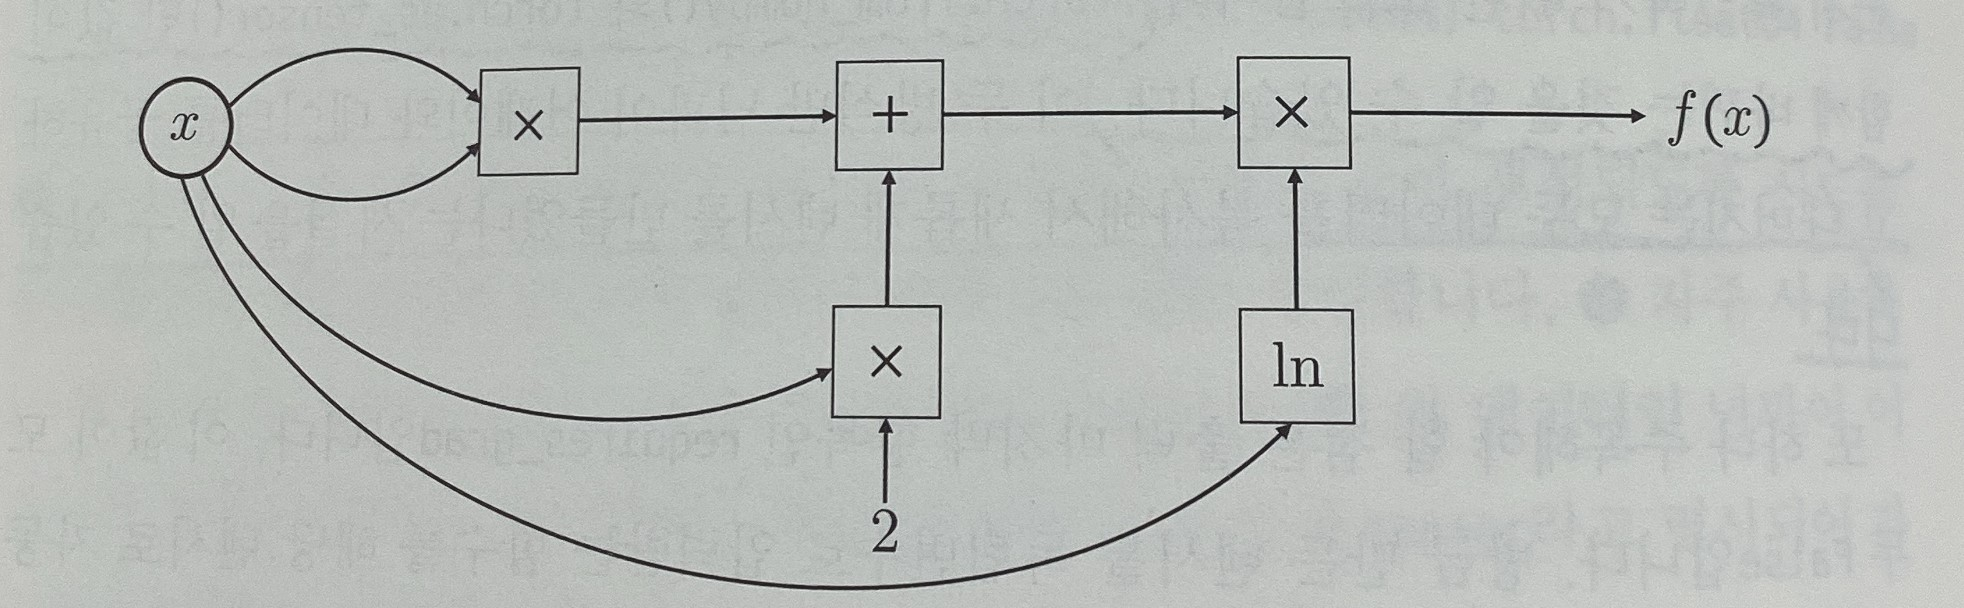

In [24]:
Image(r'cal_graph.jpg')

## 1. torch.autograd.backward()

In [5]:
x = torch.tensor([1.0], requires_grad=True)
f = (x**2 + 2*x) * torch.log(x)

In [6]:
print(x)

tensor([1.], requires_grad=True)


In [82]:
print(f)

tensor([0.], grad_fn=<MulBackward0>)


In [83]:
## 아직 미분계산 안해서
print(x.grad)

None


In [84]:
torch.autograd.backward(f, retain_graph=True)
print(x.grad)

tensor([3.])


#### retain_graph : 미분을 위해 계산 그래프를 구상하는데, 기본적으로는 한번 미분계수를 구하고 나서는 메모리에서 이 계산 그래프를 지움
#### 그래서 다시 미분을 반복하기 위해서는 retain_graph=True로 설정해야함

## 2. torch.autograd.grad()
#### 종속변수와 미분할 변수를 모두 명시적으로 지정함

In [86]:
df = torch.autograd.grad(f,x,retain_graph=True)
print(df)

(tensor([3.]),)


In [87]:
x = torch.tensor([1.0], requires_grad=True)
y = torch.tensor([2.0], requires_grad=True)
f_xy = (x**2 + 2*x) * torch.log(y)

torch.autograd.backward(f_xy, retain_graph=True)
print(x.grad)

tensor([2.7726])


In [88]:
print(y.grad)

tensor([1.5000])


In [90]:
df = torch.autograd.grad(f_xy, (x,y), retain_graph=True)
print(df)

(tensor([2.7726]), tensor([1.5000]))


### grad() 를 사용하는 편이 미분계수 확인하는 목적에 더 잘 부합함.
### pytorch 자동미분이 수치미분에서 보이는 오차가 없음. 
### -> pytorch는 미분계수 구할 때 수치미분 하지 않음. 즉, 자동미분

## 자동미분 예제

#### cache : 함수값 계산결과 저장
#### dout : 미분계수 저장

In [97]:
def times(x,y):
    return x*y , (x,y)

def times_deriv(cache, dout=1):
    return cache[1]*dout, cache[0]*dout

TIMES = {'f':times, 'df':times_deriv}

v, cache = TIMES['f'](2,3)
dx, dy = TIMES['df'](cache)


print("dx={}, dy={}".format(dx,dy))

dx=3, dy=2


In [98]:
def add(x,y):
    return x+y, (x,y)

def add_deriv(cache, dout=1):
    return dout, dout

ADD = {'f': add, 'df': add_deriv}

def log(x):
    return np.log(x), x

def log_deriv(cache, dout=1):
    return (1/cache)*dout

LOG = {'f': log, 'df': log_deriv}

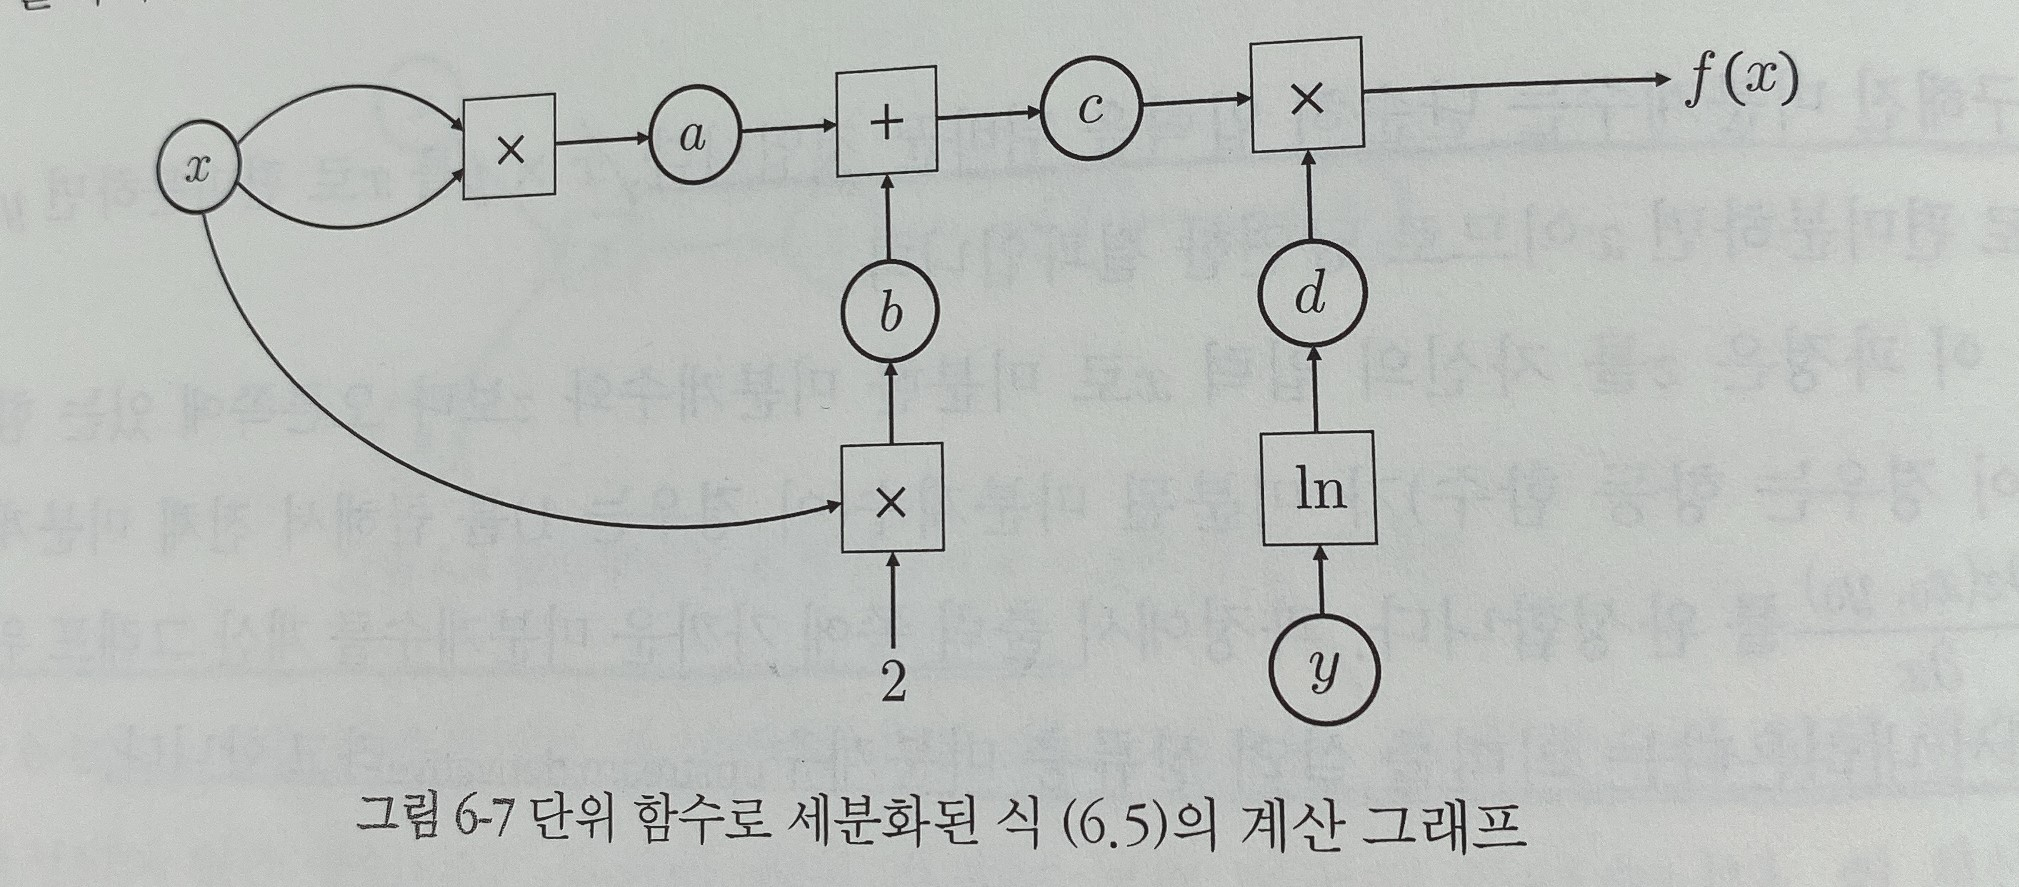

In [25]:
Image(r'cal_graph1.jpg')

### 순전파

In [99]:
import numpy as np

x = 1.; y = 2.

a, cache_a = TIMES['f'](x, x)
b, cache_b = TIMES['f'](2, x)
c, cache_c = ADD['f'](a, b)
d, cache_d = LOG['f'](y)
z, cache_z = TIMES['f'](c, d)

### 역전파

In [100]:
dx = dy = 0.

dc, dd = TIMES['df'](cache_z, 1)
dy = LOG['df'](cache_d, dd)
da, db = ADD['df'](cache_c, dc)
_, dx_ = TIMES['df'](cache_b, db); dx += dx_;
dx_, dx__ = TIMES['df'](cache_a, da); dx += dx_ + dx__;

print('backward pass dx = {:.6f}, dy = {:.6f}'.format(dx,dy))

backward pass dx = 2.772589, dy = 1.500000


### grad_outputs=torch.tensor([1.0]) 의 의미: 상류층 미분계수를 2로 둠
#### torch.autograd.grad 비교

In [7]:
x = torch.tensor([1.], requires_grad=True)
y = torch.tensor([2.], requires_grad=True)
z = (x**2 +2*x)*torch.log(y)
dz = torch.autograd.grad(z, (x,y), grad_outputs=torch.tensor([1.]), retain_graph=True)
print(dz)

(tensor([2.7726]), tensor([1.5000]))
